EVENTS

In [1]:
import pandas as pd
inventory_items = pd.read_csv('/content/Inventory.csv')
distribution_centers = pd.read_csv('/content/distribution_centers.csv')
events = pd.read_csv('/content/events.csv')
order_items = pd.read_csv('/content/order_items.csv')
orders = pd.read_csv('/content/orders.csv')
users = pd.read_csv('/content/users.csv')

print(events.head())
print(events.info())


FileNotFoundError: [Errno 2] No such file or directory: '/content/Inventory.csv'

In [ ]:
events.head()

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,1889001,NaN,3,649eb2f9-4965-4b9f-9f35-931c91a59785,2021-04-24 05:29:00 UTC,28.83.46.247,São Paulo,São Paulo,02675-031,Safari,Email,/cancel,cancel
1,2220610,NaN,3,25ab2d2f-1d91-499d-890c-b5c4cb8b4522,2020-08-30 13:33:00 UTC,42.146.37.173,São Paulo,São Paulo,02675-031,Safari,Email,/cancel,cancel
2,1545947,NaN,3,c194df8a-19e0-4df5-9af0-5d1cc35e7165,2020-07-04 08:47:00 UTC,9.66.211.17,São Paulo,São Paulo,02675-031,Firefox,Facebook,/cancel,cancel
3,1398855,NaN,3,e240ddc0-e9f4-4749-8945-e72a9e5c39f3,2022-07-31 10:01:00 UTC,7.81.94.186,São Paulo,São Paulo,02675-031,Chrome,Adwords,/cancel,cancel
4,1668196,NaN,3,6b603097-4982-4c92-b9e4-363b5fd453a0,2024-02-04 06:19:00 UTC,78.218.167.53,São Paulo,São Paulo,02675-031,Chrome,Adwords,/cancel,cancel


In [ ]:
# replceing null
events['user_id'] = events['user_id'].fillna(0).astype(int)



In [ ]:
events['created_at'] = pd.to_datetime(events['created_at'], errors='coerce')

In [ ]:
null_values = events.isnull().sum()

print("Null Values:")
print(null_values)


Null Values:
id                     0
user_id                0
sequence_number        0
session_id             0
created_at         33712
ip_address             0
city               24262
state                  0
postal_code            0
browser                0
traffic_source         0
uri                    0
event_type             0
dtype: int64


In [ ]:
events = events.dropna()


In [ ]:
events.dtypes

,0
id,int64
user_id,int64
sequence_number,int64
session_id,object
created_at,"datetime64[ns, UTC]"
ip_address,object
city,object
state,object
postal_code,object
browser,object


In [ ]:
events['city'] = events['city'].fillna('unknown')

In [ ]:
events.to_csv('/content/events.csv', index=False)

In [ ]:
from google.colab import files

files.download('/content/events.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

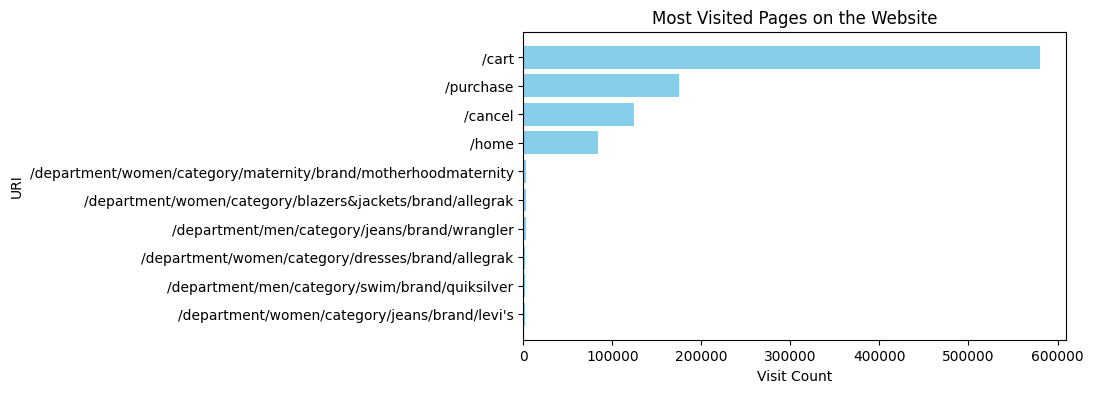

In [ ]:
import matplotlib.pyplot as plt

most_visited_pages = events['uri'].value_counts().head(10).reset_index()
most_visited_pages.columns = ['URI', 'Visit Count']

plt.figure(figsize=(7, 4))
plt.barh(most_visited_pages['URI'], most_visited_pages['Visit Count'], color='skyblue')
plt.xlabel('Visit Count')
plt.ylabel('URI')
plt.title('Most Visited Pages on the Website')
plt.gca().invert_yaxis()

plt.show()



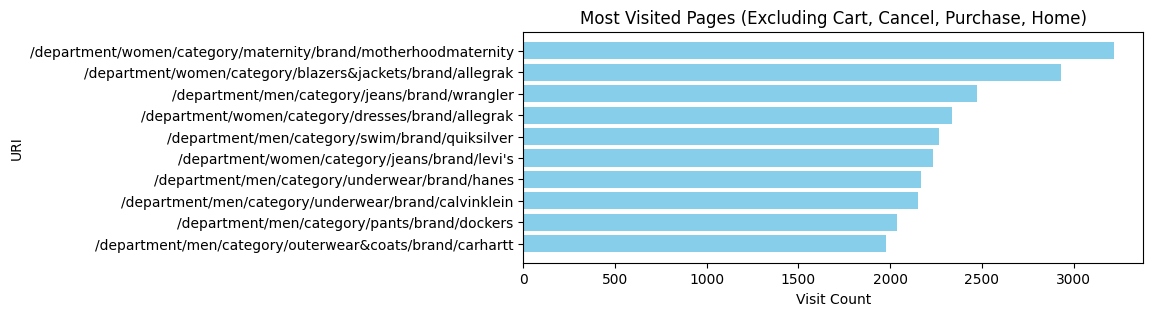

In [ ]:
filtered_visited_pages = events[~events['uri'].isin(['/cart', '/cancel', '/purchase', '/home'])]

filtered_most_visited_pages = filtered_visited_pages['uri'].value_counts().head(10).reset_index()
filtered_most_visited_pages.columns = ['URI', 'Visit Count']

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
plt.barh(filtered_most_visited_pages['URI'], filtered_most_visited_pages['Visit Count'], color='skyblue')
plt.xlabel('Visit Count')
plt.ylabel('URI')
plt.title('Most Visited Pages (Excluding Cart, Cancel, Purchase, Home)')
plt.gca().invert_yaxis()
plt.show()


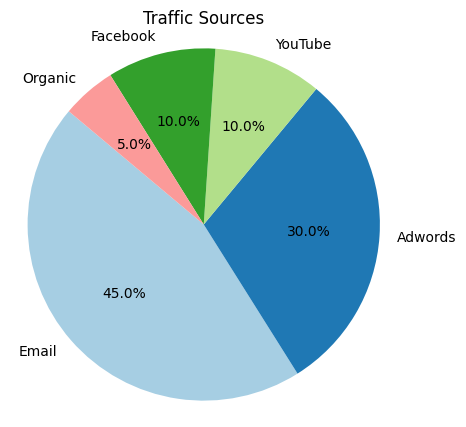

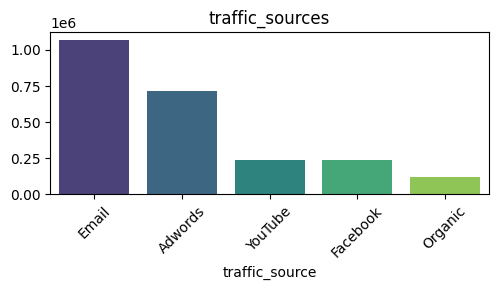

In [ ]:
traffic_sources = events['traffic_source'].value_counts().reset_index()
traffic_sources.columns = ['Traffic Source', 'Event Count']

plt.figure(figsize=(5, 5))
plt.pie(traffic_sources['Event Count'], labels=traffic_sources['Traffic Source'], autopct='%1.1f%%',
        startangle=140, colors=plt.cm.Paired.colors)
plt.title('Traffic Sources')
plt.axis('equal')
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
traffic_source_counts = events['traffic_source'].value_counts()
plt.figure(figsize=(5, 3))
sns.barplot(x=traffic_source_counts.index, y=traffic_source_counts.values,
            hue=traffic_source_counts.index, palette='viridis', dodge=False, legend=False)
plt.xlabel('traffic_source', fontsize=10)
plt.title('traffic_sources', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

   Event Type   Count
0     product  827955
1  department  580835
2        cart  580418
3    purchase  175118
4      cancel  123825


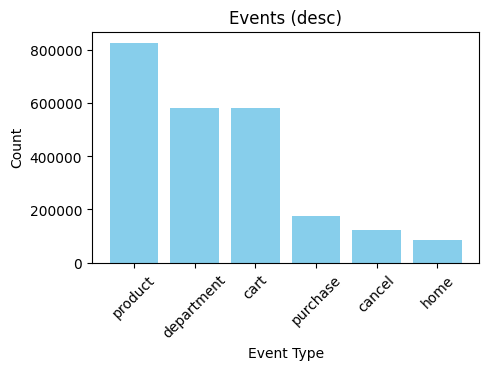

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

event_type_counts = events['event_type'].value_counts()
event_type_counts_df = event_type_counts.reset_index()
event_type_counts_df.columns = ['Event Type', 'Count']
print(event_type_counts_df.head())

plt.figure(figsize=(5, 3))
plt.bar(event_type_counts_df['Event Type'], event_type_counts_df['Count'], color='skyblue')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.title('Events (desc)')
plt.xticks(rotation=45)
plt.show()

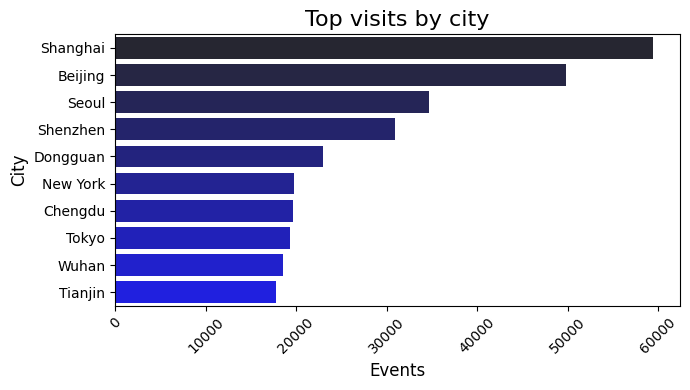

In [ ]:
city_event_counts = events['city'].value_counts().head(10)

plt.figure(figsize=(7, 4))
sns.barplot(y=city_event_counts.index, x=city_event_counts.values,
            hue=city_event_counts.index, palette='dark:Blue', dodge=False, legend=False)

plt.ylabel('City', fontsize=12)
plt.xlabel('Events', fontsize=12)
plt.title('Top visits by city', fontsize=16)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

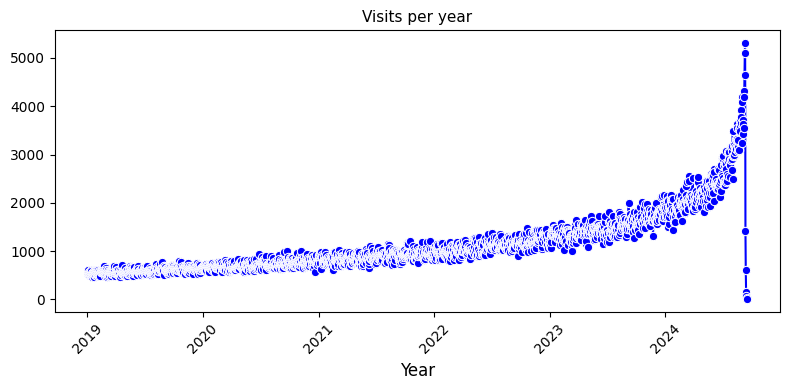

In [ ]:
events['created_at'] = pd.to_datetime(events['created_at'])

events_by_date = events['created_at'].dt.date.value_counts().sort_index()
plt.figure(figsize=(8,4))
sns.lineplot(x=events_by_date.index, y=events_by_date.values, marker='o', color='b')
plt.xlabel('Year', fontsize=12)
plt.title('Visits per year', fontsize=11)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

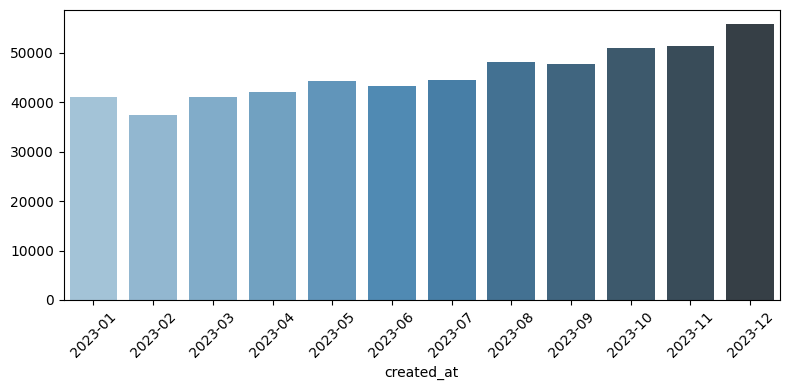

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

events['created_at'] = pd.to_datetime(events['created_at'])
events_2023 = events[events['created_at'].dt.year == 2023]
events_month_2023 = events_2023['created_at'].dt.strftime('%Y-%m').value_counts().sort_index()

plt.figure(figsize=(8, 4))
sns.barplot(x=events_month_2023.index, y=events_month_2023.values,
            hue=events_month_2023.index, palette='Blues_d', dodge=False)

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()


In [ ]:
registered = events[events['user_id'] != 0].shape[0]
unregistered = events[events['user_id'] == 0].shape[0]

user_counts = pd.DataFrame({
    'User': ['Registered', 'Unregistered'],
    'Count': [registered, unregistered]
})

print(user_counts)



           User    Count
0    Registered  1257572
1  Unregistered  1114903


In [ ]:
inventory_items.head()

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,127072,13844,2024-06-19 09:22:03 UTC,2024-08-05 11:08:03 UTC,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,127073,13844,2020-05-04 10:05:00 UTC,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,127074,13844,2020-05-06 12:07:00 UTC,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,127075,13844,2023-10-17 13:53:00 UTC,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,128828,13844,2023-04-02 14:56:43 UTC,2023-05-16 21:50:43 UTC,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7


In [ ]:
num_categories = inventory_items['product_category'].unique()
print(f"CAtegories: {num_categories}")



CAtegories: ['Accessories' 'Active' 'Blazers & Jackets' 'Clothing Sets' 'Dresses'
 'Fashion Hoodies & Sweatshirts' 'Intimates' 'Jeans' 'Jumpsuits & Rompers'
 'Leggings' 'Maternity' 'Outerwear & Coats' 'Pants' 'Pants & Capris'
 'Plus' 'Shorts' 'Skirts' 'Sleep & Lounge' 'Socks' 'Socks & Hosiery'
 'Suits' 'Suits & Sport Coats' 'Sweaters' 'Swim' 'Tops & Tees' 'Underwear']


In [ ]:
missing_categories_count = inventory_items['product_category'].isnull().sum()
print(f"nulls: {missing_categories_count}")


nulls: 0


In [ ]:
missing_values = inventory_items.isnull().sum()
print(missing_values.head())


id                 0
product_id         0
created_at         0
sold_at       308509
cost               0
dtype: int64


In [ ]:
inventory_items['created_at'] = pd.to_datetime(inventory_items['created_at'], errors='coerce')
inventory_items['sold_at'] = pd.to_datetime(inventory_items['sold_at'], errors='coerce')

In [ ]:
inventory_items.dtypes

,0
id,int64
product_id,int64
created_at,"datetime64[ns, UTC]"
sold_at,"datetime64[ns, UTC]"
cost,float64
product_category,object
product_name,object
product_brand,object
product_retail_price,float64
product_department,object


In [ ]:
inventory_items.to_csv('/content/Inventory_items.csv', index=False)

In [ ]:
inventory_items = inventory_items.drop_duplicates()

In [ ]:
inventory_items['sold_at'] = inventory_items['sold_at'].fillna('Not Sold')

In [ ]:
inventory_items['created_at'] = pd.to_datetime(inventory_items['created_at'], errors='coerce')
inventory_items['sold_at'] = pd.to_datetime(inventory_items['sold_at'], errors='coerce')


In [ ]:
inventory_items['cost'] = inventory_items['cost'].fillna(0)
inventory_items['product_category'] = inventory_items['product_category'].fillna('Unknown')


In [ ]:
inventory_items.to_csv('/content/Inventory_items.csv', index=False)


In [ ]:
inventory_items['sold_at'] = inventory_items['sold_at'].fillna('Not Sold')

In [ ]:
inventory_items = inventory_items.drop_duplicates()

In [ ]:
inventory_items = inventory_items[inventory_items['created_at'].notna()]

In [ ]:
inventory_items['product_name'] = inventory_items['product_name'].fillna('unknown')
inventory_items['product_brand'] = inventory_items['product_brand'].fillna('unknown')

In [ ]:
print("\nNull values:")
print(inventory_items.isna().sum())


Null values:
id                                0
product_id                        0
created_at                        0
sold_at                           0
cost                              0
product_category                  0
product_name                      0
product_brand                     0
product_retail_price              0
product_department                0
product_sku                       0
product_distribution_center_id    0
dtype: int64


In [ ]:
inventory_items.to_csv('/content/inventory_items.csv', index=False)


In [ ]:
sold_products = inventory_items[inventory_items['sold_at'].notna()]
unsold_products = inventory_items[inventory_items['sold_at'].isna()]

total_sold = sold_products.shape[0]
total_unsold = unsold_products.shape[0]

print(f"Items sold: {total_sold}")
print(f"Items unsold: {total_unsold}")

Items sold: 485315
Items unsold: 0


In [ ]:
sales_by_category = sold_products.groupby('product_category')['product_id'].count().reset_index()
sales_by_category.columns = ['Category', 'Products Sold']
sales_by_category = sales_by_category.sort_values(by='Products Sold', ascending=False).head(10)

print("\nSolds by category:")
print(sales_by_category)


Solds by category:
                         Category  Products Sold
6                       Intimates          36226
7                           Jeans          34240
24                    Tops & Tees          32015
5   Fashion Hoodies & Sweatshirts          31057
17                 Sleep & Lounge          30116
23                           Swim          29969
22                       Sweaters          29622
15                         Shorts          29567
0                     Accessories          26124
1                          Active          24286



Top products by category:
                         Category  Products Sold
6                       Intimates          36226
7                           Jeans          34240
24                    Tops & Tees          32015
5   Fashion Hoodies & Sweatshirts          31057
17                 Sleep & Lounge          30116


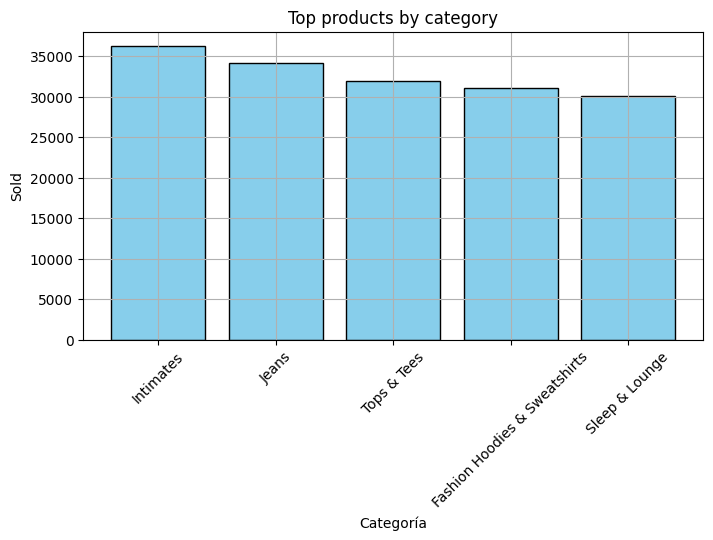

In [ ]:
import matplotlib.pyplot as plt

sales_by_category = sold_products.groupby('product_category')['product_id'].count().reset_index()
sales_by_category.columns = ['Category', 'Products Sold']
sales_by_category = sales_by_category.sort_values(by='Products Sold', ascending=False)
top_5_sales_by_category = sales_by_category.head(5)
print("\nTop products by category:")
print(top_5_sales_by_category)

plt.figure(figsize=(8, 4))
plt.bar(top_5_sales_by_category['Category'], top_5_sales_by_category['Products Sold'], color='skyblue', edgecolor='black')
plt.title('Top products by category')
plt.xlabel('Categoría')
plt.ylabel('Sold')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()



Top Products by Category:
               Category  Products Sold
3         Clothing Sets            601
8   Jumpsuits & Rompers           2521
20                Suits           2830
16               Skirts           5737
9              Leggings           8638
2     Blazers & Jackets           8700
13       Pants & Capris           9308
19      Socks & Hosiery           9939
14                 Plus          11802
21  Suits & Sport Coats          13270

Products sold by category:
count       10.000000
mean      7334.600000
std       4226.672876
min        601.000000
25%       3556.750000
50%       8669.000000
75%       9781.250000
max      13270.000000
Name: Products Sold, dtype: float64


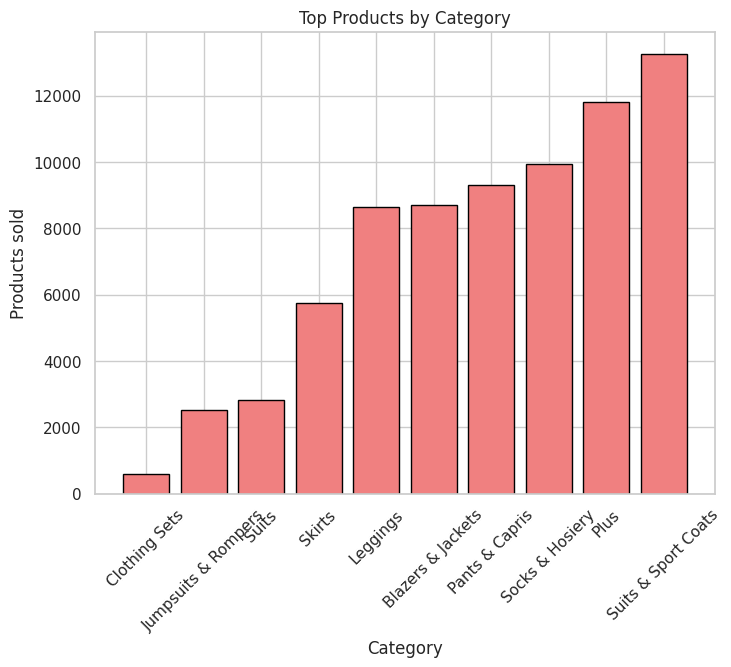

In [ ]:
import matplotlib.pyplot as plt

sales_by_category = sold_products.groupby('product_category')['product_id'].count().reset_index()
sales_by_category.columns = ['Category', 'Products Sold']

sales_by_category = sales_by_category.sort_values(by='Products Sold', ascending=True)

bottom_10_sales_by_category = sales_by_category.head(10)

print("\nTop Products by Category:")
print(bottom_10_sales_by_category)

print("\nProducts sold by category:")
print(bottom_10_sales_by_category['Products Sold'].describe())

plt.figure(figsize=(8, 6))
plt.bar(bottom_10_sales_by_category['Category'], bottom_10_sales_by_category['Products Sold'], color='lightcoral', edgecolor='black')
plt.title('Top Products by Category')
plt.xlabel('Category')
plt.ylabel('Products sold')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


In [ ]:
sold_products['profit_margin'] = sold_products['product_retail_price'] - sold_products['cost']

product_profit_margins = sold_products[['product_name', 'profit_margin']].sort_values(by='profit_margin', ascending=False)
print("\nMProfit  by product:")
print(product_profit_margins)





MProfit  by product:
                                      product_name  profit_margin
211256                                       Darla     594.404999
211250                                       Darla     594.404999
211248                                       Darla     594.404999
211247                                       Darla     594.404999
211246                                       Darla     594.404999
...                                            ...            ...
10301   Indestructable Aluminum Aluma Wallet - RED       0.011700
10296   Indestructable Aluminum Aluma Wallet - RED       0.011700
10295   Indestructable Aluminum Aluma Wallet - RED       0.011700
10294   Indestructable Aluminum Aluma Wallet - RED       0.011700
10300   Indestructable Aluminum Aluma Wallet - RED       0.011700

[485315 rows x 2 columns]


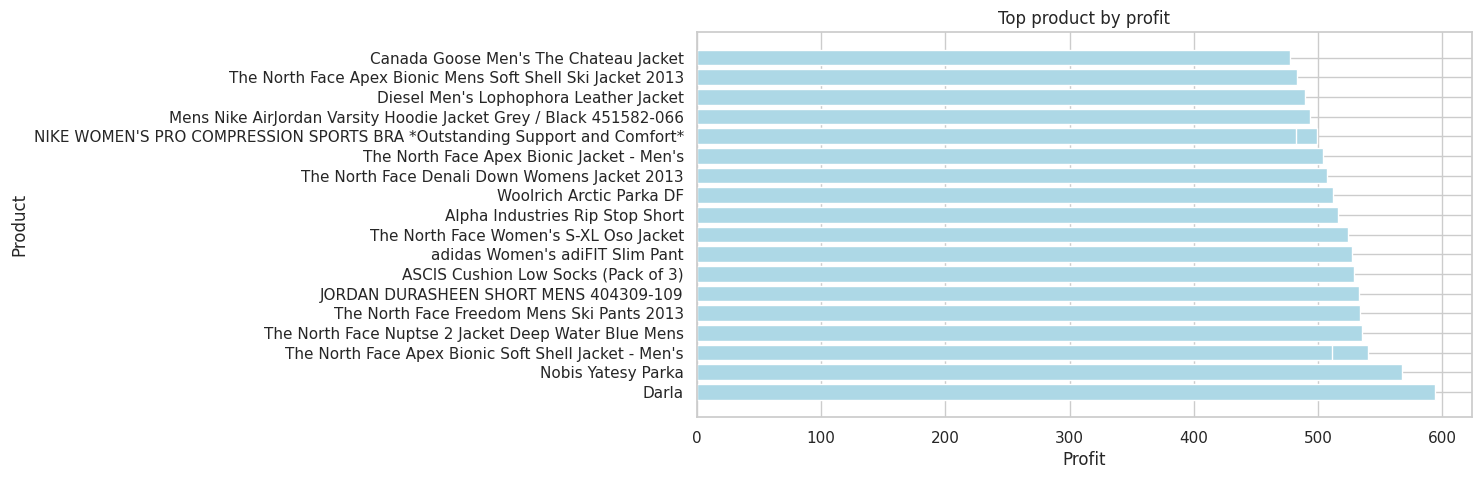

In [ ]:
import matplotlib.pyplot as plt
top_20_products = product_profit_margins.drop_duplicates(subset='profit_margin').head(20)

plt.figure(figsize=(10, 5))
plt.barh(top_20_products['product_name'], top_20_products['profit_margin'], color='lightblue')
plt.xlabel('Profit')
plt.ylabel('Product')
plt.title('Top product by profit')
plt.show()


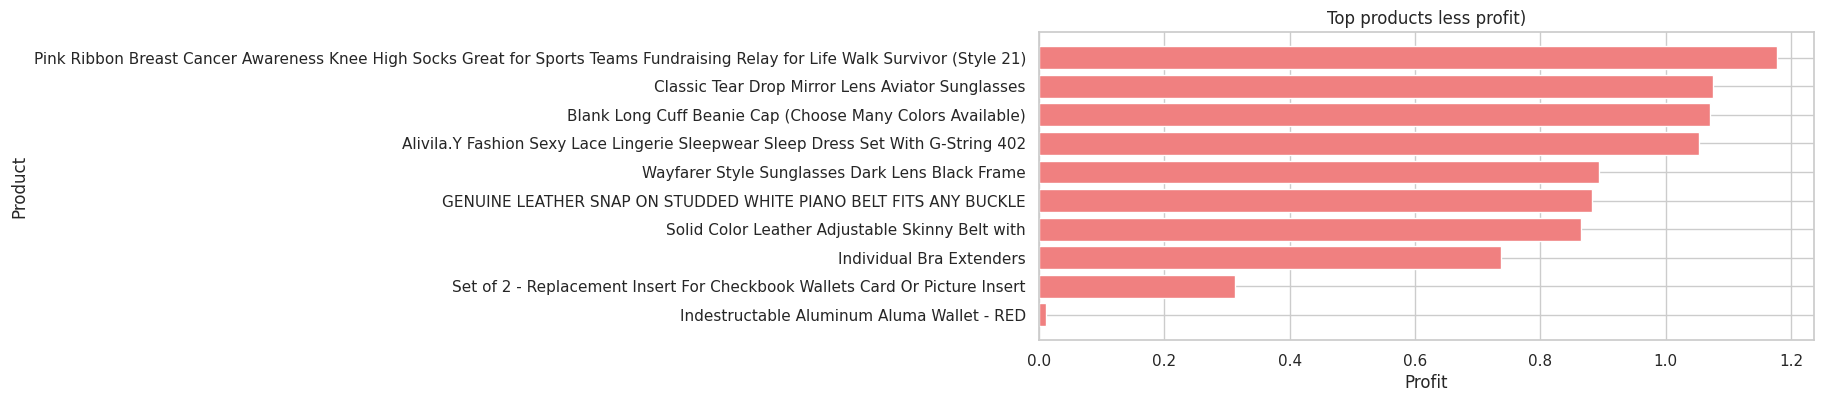

In [ ]:
bottom_20_unique_products = product_profit_margins.drop_duplicates(subset='product_name').sort_values(by='profit_margin', ascending=True).head(10)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.barh(bottom_20_unique_products['product_name'], bottom_20_unique_products['profit_margin'], color='lightcoral')
plt.xlabel('Profit')
plt.ylabel('Product')
plt.title('Top products less profit)')
plt.show()


In [ ]:
sales_by_distribution_center = sold_products.groupby('product_distribution_center_id')['product_id'].count().reset_index()

sales_by_distribution_center.columns = ['Distribution Center ID', 'Products Sold']

sales_by_distribution_center = sales_by_distribution_center.sort_values(by='Products Sold', ascending=False)

print("\nSales by distribution center:")
print(sales_by_distribution_center)



Sales by distribution center:
   Distribution Center ID  Products Sold
1                       2          64871
0                       1          63912
2                       3          61418
7                       8          48892
3                       4          46375
6                       7          45152
8                       9          44442
5                       6          43947
4                       5          34416
9                      10          31890


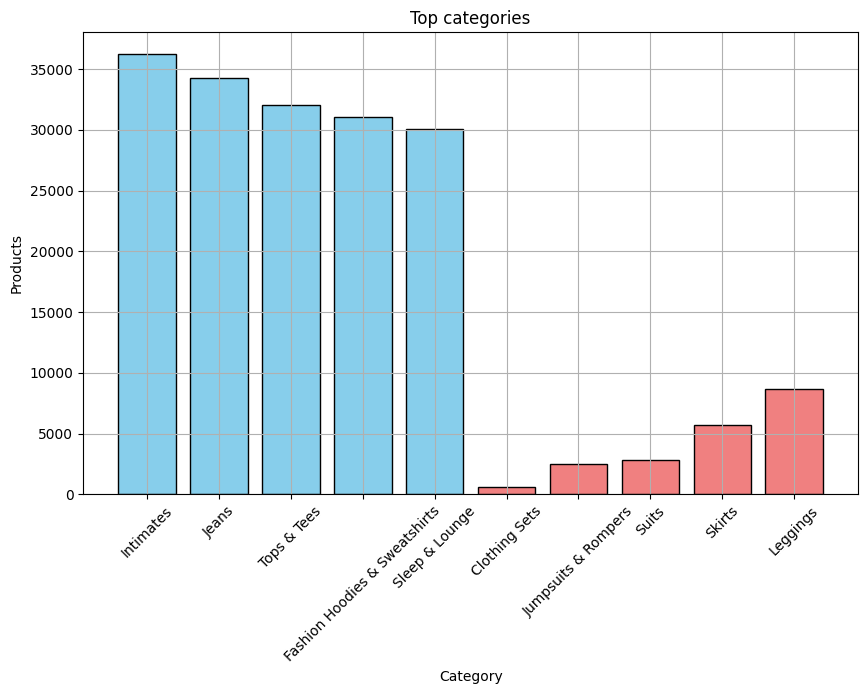

In [ ]:
import matplotlib.pyplot as plt

sales_by_category = sold_products.groupby('product_category')['product_id'].count().reset_index()
sales_by_category.columns = ['Category', 'Products Sold']

top_5_sales_by_category = sales_by_category.sort_values(by='Products Sold', ascending=False).head(5)
bottom_5_sales_by_category = sales_by_category.sort_values(by='Products Sold', ascending=True).head(5)

combined_sales = pd.concat([top_5_sales_by_category, bottom_5_sales_by_category])

plt.figure(figsize=(10, 6))
plt.bar(combined_sales['Category'], combined_sales['Products Sold'], color=['skyblue']*5 + ['lightcoral']*5, edgecolor='black')
plt.title('Top categories')
plt.xlabel('Category')
plt.ylabel('Products')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


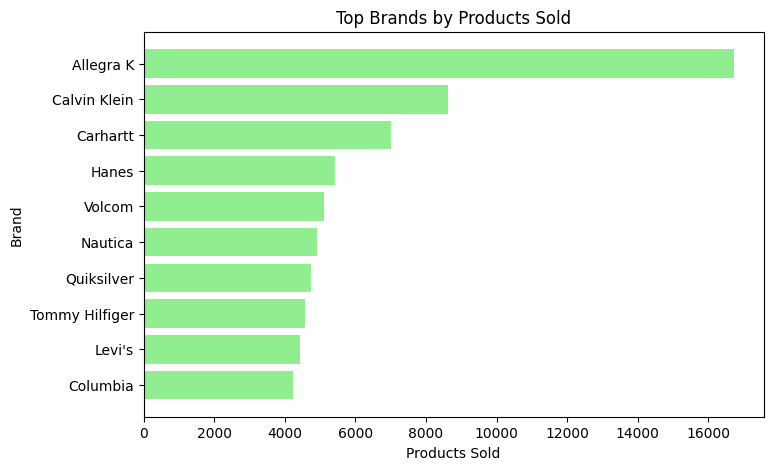

In [ ]:
# Load the product sales data from a CSV or Excel file
product_sales = pd.read_csv('/content/Inventory_items.csv')  # or pd.read_excel('your_file.xlsx')

# Now your product_sales DataFrame is defined and the rest of your code should work
sales_by_brand = product_sales.groupby('product_brand')['id'].count().reset_index()
sales_by_brand = sales_by_brand.rename(columns={'id': 'products_sold'})
top_10_brands = sales_by_brand.sort_values(by='products_sold', ascending=False).head(10)

# Plotting the top 10 brands by products sold
plt.figure(figsize=(8, 5))
plt.barh(top_10_brands['product_brand'], top_10_brands['products_sold'], color='lightgreen')
plt.xlabel('Products Sold')
plt.ylabel('Brand')
plt.title('Top Brands by Products Sold')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
sales_by_distribution_center_desc = sales_by_distribution_center.sort_values(by='Products Sold', ascending=False)

profit_by_distribution_center = sold_products.groupby('product_distribution_center_id')['profit_margin'].mean().reset_index()
profit_by_distribution_center.columns = ['Distribution Center ID', 'Average Profit Margin']

profit_by_distribution_center_desc = profit_by_distribution_center.sort_values(by='Average Profit Margin', ascending=False)

print("\nSales by distro (desc):")
print(sales_by_distribution_center_desc)

print("\nSales by distro (asc):")
print(profit_by_distribution_center_desc)


Sales by distro (desc):
   Distribution Center ID  Products Sold
1                       2          64871
0                       1          63912
2                       3          61418
7                       8          48892
3                       4          46375
6                       7          45152
8                       9          44442
5                       6          43947
4                       5          34416
9                      10          31890

Sales by distro (asc):
   Distribution Center ID  Average Profit Margin
2                       3              37.038162
7                       8              34.402940
9                      10              33.471784
4                       5              32.974032
6                       7              32.908021
0                       1              31.070574
5                       6              29.262287
1                       2              29.058463
3                       4              28.199076
8         

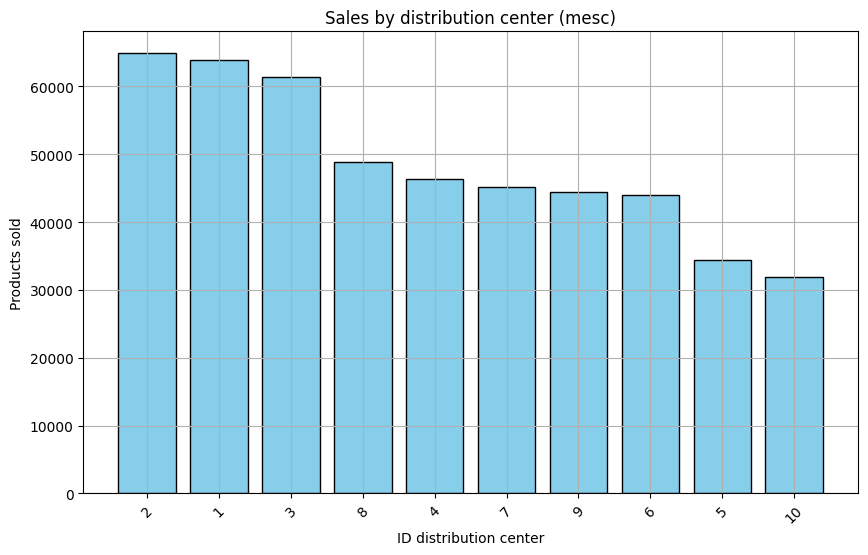

In [ ]:
import matplotlib.pyplot as plt

sales_by_distribution_center_desc = sales_by_distribution_center.sort_values(by='Products Sold', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(sales_by_distribution_center_desc['Distribution Center ID'].astype(str), sales_by_distribution_center_desc['Products Sold'], color='skyblue', edgecolor='black')
plt.xlabel('ID distribution center')
plt.ylabel('Products sold')
plt.title('Sales by distribution center (mesc)')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


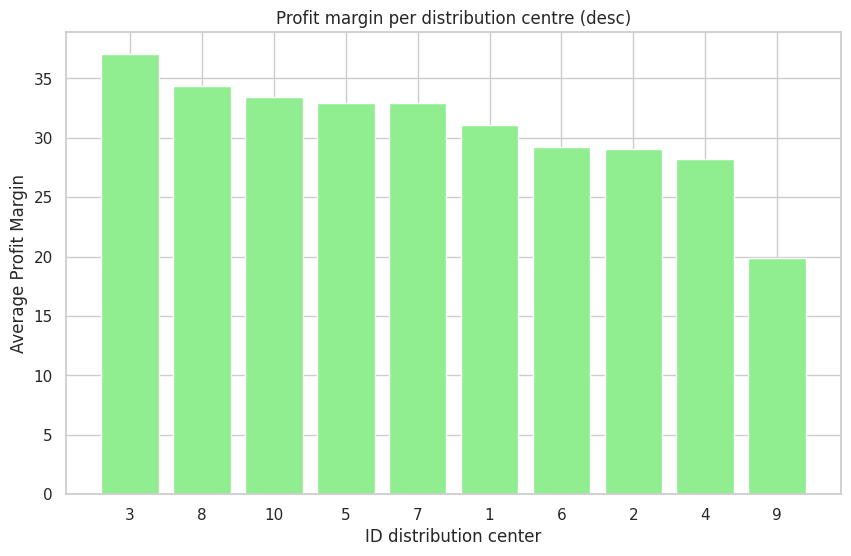

In [ ]:
# I made this one later with the join and based in Sale_price/cost instead Retail_sale_price
plt.figure(figsize=(10, 6))
plt.bar(profit_by_distribution_center_desc['Distribution Center ID'].astype(str), profit_by_distribution_center_desc['Average Profit Margin'], color='lightgreen')
plt.xlabel('ID distribution center')
plt.ylabel('Average Profit Margin')
plt.title('Profit margin per distribution centre (desc)')
plt.show()

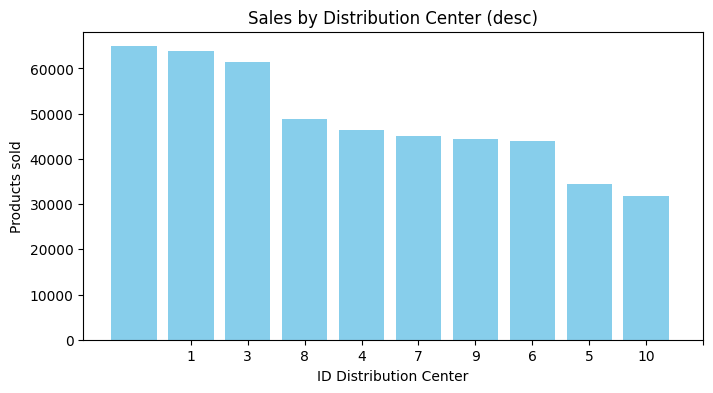

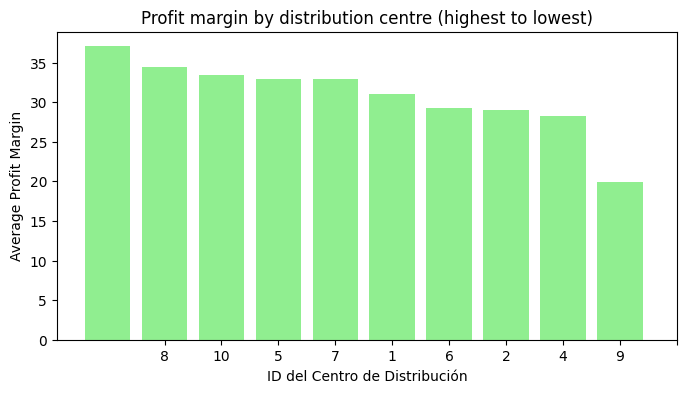

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 4))
plt.bar(sales_by_distribution_center_desc['Distribution Center ID'].astype(str), sales_by_distribution_center_desc['Products Sold'], color='skyblue')
plt.xlabel('ID Distribution Center')
plt.ylabel('Products sold')
plt.title('Sales by Distribution Center (desc)')

plt.xticks(np.arange(min(sales_by_distribution_center_desc['Distribution Center ID']),
                     max(sales_by_distribution_center_desc['Distribution Center ID']) + 1, 1))
plt.show()

plt.figure(figsize=(8, 4))
plt.bar(profit_by_distribution_center_desc['Distribution Center ID'].astype(str), profit_by_distribution_center_desc['Average Profit Margin'], color='lightgreen')
plt.xlabel('ID del Centro de Distribución')
plt.ylabel('Average Profit Margin')
plt.title('Profit margin by distribution centre (highest to lowest)')

plt.xticks(np.arange(min(profit_by_distribution_center_desc['Distribution Center ID']),
                     max(profit_by_distribution_center_desc['Distribution Center ID']) + 1, 1))
plt.show()


In [ ]:
order_items.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,164929,113613,90947,14235,445280,Complete,2022-01-21 15:04:03 UTC,2022-01-24 09:56:00 UTC,2022-01-24 10:42:00 UTC,NaN,0.02
1,164210,113106,90556,14235,443365,Returned,2023-12-31 11:45:54 UTC,2024-01-02 05:57:00 UTC,2024-01-05 19:37:00 UTC,2024-01-06 01:32:00 UTC,0.02
2,98533,67868,54319,14235,265968,Shipped,2023-07-22 03:55:41 UTC,2023-07-23 01:25:00 UTC,NaN,NaN,0.02
3,10097,6887,5414,14159,27113,Complete,2023-12-09 01:36:00 UTC,2023-12-06 07:22:00 UTC,2023-12-07 11:04:00 UTC,NaN,0.49
4,102997,70949,56842,14159,278065,Complete,2024-03-24 04:55:16 UTC,2024-03-27 04:12:00 UTC,2024-03-30 07:34:00 UTC,NaN,0.49


In [ ]:
print(order_items.isna().sum())


id                        0
order_id                  0
user_id                   0
product_id                0
inventory_item_id         0
status                    0
created_at                0
shipped_at            63318
delivered_at         118130
returned_at          163157
sale_price                0
dtype: int64


In [ ]:
print(order_items.duplicated().sum())

0


In [ ]:
order_items['created_at'] = pd.to_datetime(order_items['created_at'], errors='coerce')
order_items['shipped_at'] = pd.to_datetime(order_items['shipped_at'], errors='coerce')
order_items['delivered_at'] = pd.to_datetime(order_items['delivered_at'], errors='coerce')
order_items['returned_at'] = pd.to_datetime(order_items['returned_at'], errors='coerce')

In [ ]:
order_items.dtypes

,0
id,int64
order_id,int64
user_id,int64
product_id,int64
inventory_item_id,int64
status,object
created_at,"datetime64[ns, UTC]"
shipped_at,"datetime64[ns, UTC]"
delivered_at,"datetime64[ns, UTC]"
returned_at,"datetime64[ns, UTC]"


In [ ]:
order_items.to_csv('/content/order_items.csv', index=False)

In [ ]:
order_items = order_items.dropna(subset=['shipped_at', 'delivered_at'])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

order_items = pd.read_csv("/content/order_items.csv")
print(order_items.describe())

                  id       order_id        user_id     product_id  \
count  181461.000000  181461.000000  181461.000000  181461.000000   
mean    90731.000000   62484.946236   50016.900260   15200.155207   
std     52383.422936   36102.233772   28937.610424    8416.607564   
min         1.000000       1.000000       2.000000       1.000000   
25%     45366.000000   31193.000000   24940.000000    7905.000000   
50%     90731.000000   62530.000000   50138.000000   15842.000000   
75%    136096.000000   93759.000000   75192.000000   22469.000000   
max    181461.000000  124980.000000   99999.000000   29120.000000   

       inventory_item_id     sale_price  
count      181461.000000  181461.000000  
mean       244862.636633      59.630499  
std        141496.371498      66.360865  
min             2.000000       0.020000  
25%        122254.000000      24.930000  
50%        244826.000000      39.990002  
75%        367436.000000      69.949997  
max        489970.000000     999.000000  


In [ ]:
order_items.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,164929,113613,90947,14235,445280,Complete,2022-01-21 15:04:03+00:00,2022-01-24 09:56:00+00:00,2022-01-24 10:42:00+00:00,NaN,0.02
1,164210,113106,90556,14235,443365,Returned,2023-12-31 11:45:54+00:00,2024-01-02 05:57:00+00:00,2024-01-05 19:37:00+00:00,2024-01-06 01:32:00+00:00,0.02
2,98533,67868,54319,14235,265968,Shipped,2023-07-22 03:55:41+00:00,2023-07-23 01:25:00+00:00,NaN,NaN,0.02
3,10097,6887,5414,14159,27113,Complete,2023-12-09 01:36:00+00:00,2023-12-06 07:22:00+00:00,2023-12-07 11:04:00+00:00,NaN,0.49
4,102997,70949,56842,14159,278065,Complete,2024-03-24 04:55:16+00:00,2024-03-27 04:12:00+00:00,2024-03-30 07:34:00+00:00,NaN,0.49


In [ ]:
print(order_items['status'].value_counts())

status
Shipped       54812
Complete      45027
Processing    36235
Cancelled     27083
Returned      18304
Name: count, dtype: int64


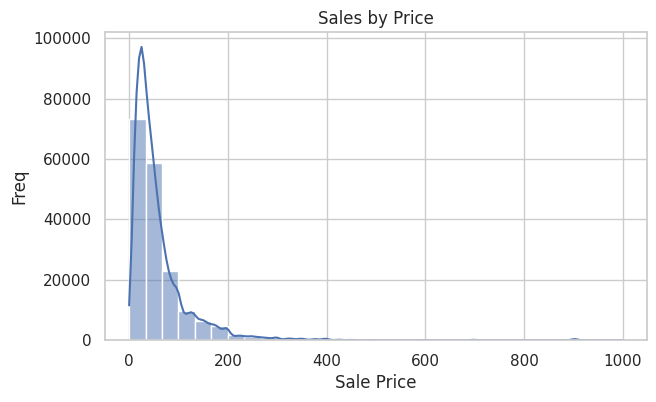

In [ ]:
plt.figure(figsize=(7, 4))
sns.histplot(order_items_clean['sale_price'], bins=30, kde=True)
plt.title('Sales by Price')
plt.xlabel('Sale Price')
plt.ylabel('Freq')
plt.show()

In [ ]:
users.head()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,1579,Patrick,Fernandez,patrickfernandez@example.org,23,M,Acre,14920 Chad Falls,69980-000,unknown,Brasil,-8.065346,-72.870949,Email,2022-05-12 11:49:00 UTC
1,12750,Cynthia,Pena,cynthiapena@example.org,41,F,Acre,5966 Mary Court,69980-000,unknown,Brasil,-8.065346,-72.870949,Search,2020-07-13 07:40:00 UTC
2,15025,Joseph,Brown,josephbrown@example.org,52,M,Acre,3720 Tammy Lakes,69980-000,unknown,Brasil,-8.065346,-72.870949,Search,2020-06-24 15:32:00 UTC
3,21602,Hannah,Montoya,hannahmontoya@example.org,67,F,Acre,68511 Caroline Mews,69980-000,unknown,Brasil,-8.065346,-72.870949,Search,2021-05-19 09:56:00 UTC
4,28139,Cathy,Jacobs,cathyjacobs@example.com,18,F,Acre,85165 Huang Island,69980-000,unknown,Brasil,-8.065346,-72.870949,Search,2021-09-20 17:21:00 UTC


In [ ]:
missing_values_users = users.isnull().sum()
print("NUll values:\n", missing_values_users)


NUll values:
 id                0
first_name        0
last_name         0
email             0
age               0
gender            0
state             0
street_address    0
postal_code       0
city              0
country           0
latitude          0
longitude         0
traffic_source    0
created_at        0
dtype: int64


In [ ]:
users.fillna('unknown', inplace=True)

users.to_csv('/content/users_cleaned.csv', index=False)

In [ ]:
users['city'].fillna('unknown', inplace=True)


In [ ]:
edades_invalidas = users[(users['age'] < 18) | (users['age'] > 100)]
print(f"users underage:\n{edades_invalidas}")

users underage:
          id  first_name last_name                        email  age gender  \
7      46499       Danny      Hunt        dannyhunt@example.com   15      M   
10     65078      Stacey  Gonzalez   staceygonzalez@example.org   17      F   
32     56112      Ashley     Ramos      ashleyramos@example.net   12      F   
45     17354       Brian    Moreno      brianmoreno@example.org   15      M   
49     83263        Ivan  Martinez     ivanmartinez@example.org   14      M   
...      ...         ...       ...                          ...  ...    ...   
99924  27171       Debra  Thompson    debrathompson@example.org   16      F   
99947  85949     Gregory   Johnson   gregoryjohnson@example.com   12      M   
99956  26766  Jacqueline     Weber  jacquelineweber@example.com   14      F   
99961  67320       Terry    Rivera      terryrivera@example.org   14      M   
99993  81026        Anne    Rhodes       annerhodes@example.com   16      F   

               state               

In [ ]:
from google.colab import files

users.to_csv('/content/users.csv', index=False)

gender
M    50189
F    49811
Name: count, dtype: int64


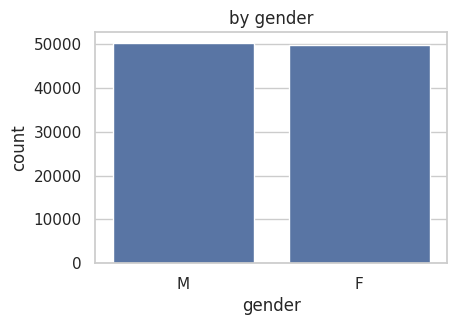

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
sns.countplot(x='gender', data=users)
plt.title('by gender')

gender_counts = users['gender'].value_counts()
print(gender_counts)

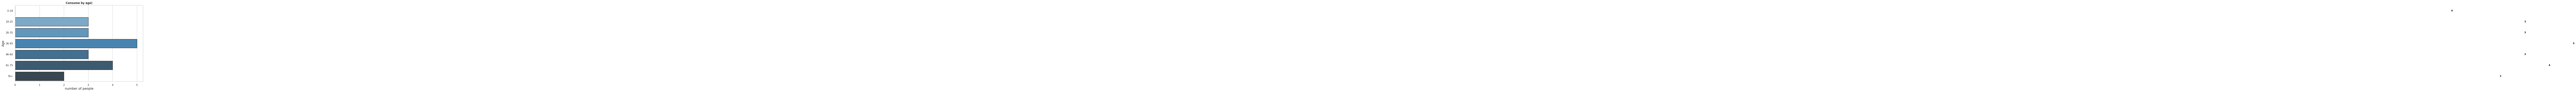

In [ ]:
# this one doesn't owrk rightnow, dunno why. Anyway this was calculated by Fabri and it worked.
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(y=age_group_counts.index.astype(str),
            x=age_group_counts.values,
            hue=age_group_counts.index.astype(str),
            dodge=False,
            palette="Blues_d",
            edgecolor='black',
            legend=False)
for i, count in enumerate(age_group_counts.values):
    plt.text(count + 100, i, str(count), va='center', ha='left', fontsize=10, fontweight='bold', color='black')
plt.title("Consume by age)", fontsize=12, fontweight='bold')
plt.xlabel("number of people", fontsize=14)
plt.ylabel("Age", fontsize=14)
plt.show()


![image.png](
  
)

Text(0.5, 1.0, 'Countries')

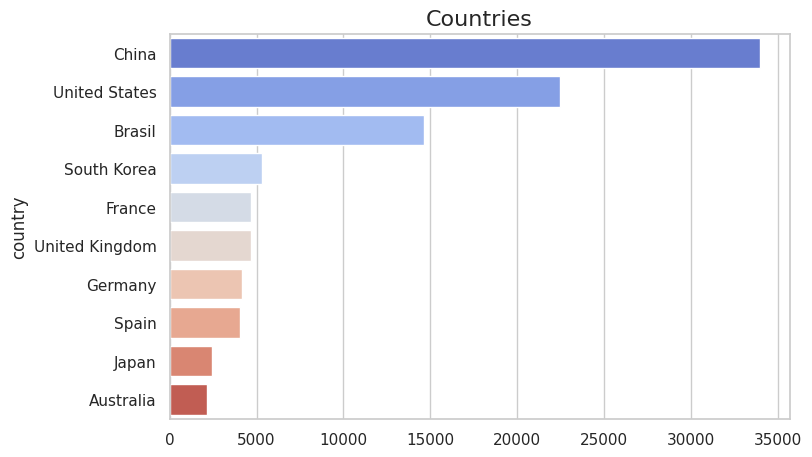

In [ ]:
plt.figure(figsize=(8, 5))
top_countries = users['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index,
            hue=top_countries.index, palette='coolwarm',
            dodge=False, legend=False)
plt.title('Countries', fontsize=16)

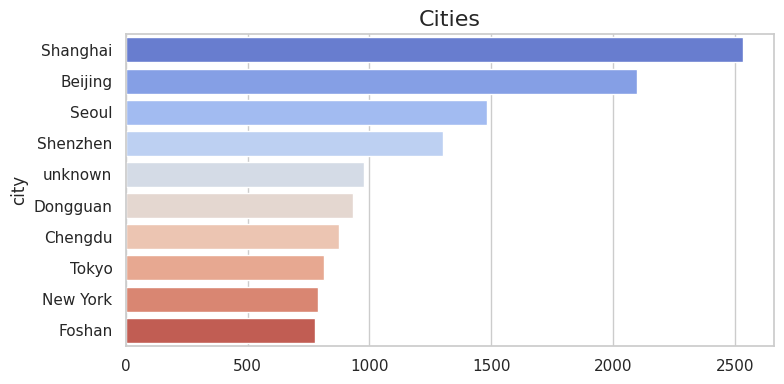

In [ ]:
plt.figure(figsize=(8, 4))
top_cities = users['city'].value_counts().head(10)

sns.barplot(x=top_cities.values, y=top_cities.index,
            hue=top_cities.index, palette='coolwarm',
            dodge=False, legend=False)
plt.title('Cities', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
orders = pd.read_csv('/content/orders.csv')
order_items = pd.read_csv('/content/order_items.csv')

In [ ]:
orders['returned_at'] = pd.to_datetime(orders['returned_at'], errors='coerce')
orders['shipped_at'] = pd.to_datetime(orders['shipped_at'], errors='coerce')
orders['delivered_at'] = pd.to_datetime(orders['delivered_at'], errors='coerce')
orders['created_at'] = pd.to_datetime(orders['created_at'], errors='coerce')

In [ ]:
orders = orders.dropna(subset=['shipped_at', 'delivered_at'])


In [ ]:
orders.to_csv('/content/orders_new.csv', index=False)

In [ ]:
orderitems_plus_orders = pd.merge(order_items, orders,
                             left_on=['order_id', 'user_id'],
                             right_on=['order_id', 'user_id'],
                             how='left',
                             suffixes=('_item_orders', '_orders'))

orderitems_plus_orders = orderitems_plus_orders.drop(columns=['created_at_item_orders', "shipped_at_item_orders", "delivered_at_item_orders", "returned_at_item_orders"])

In [ ]:
orderitems_plus_orders.rename(columns={'created_at_orders': 'created_at', 'returned_at_orders': 'returned_at', 'shipped_at_orders': 'shipped_at', 'delivered_at_orders': 'delivered_at'}, inplace=True)


In [ ]:
orderitems_plus_orders.to_csv('orderitems_plus_orders.csv', index=False)


In [ ]:
from google.colab import files
files.download('/content/orderitems_plus_orders.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
orders_inv = pd.merge(orderitems_plus_orders, inventory_items, on='product_id', how='left')
print(orders_inv.head())


     id_x  order_id  user_id  product_id  inventory_item_id  \
0  164929    113613    90947       14235             445280   
1  164929    113613    90947       14235             445280   
2  164929    113613    90947       14235             445280   
3  164929    113613    90947       14235             445280   
4  164929    113613    90947       14235             445280   

  status_item_orders  sale_price status_orders gender  \
0           Complete        0.02      Complete      F   
1           Complete        0.02      Complete      F   
2           Complete        0.02      Complete      F   
3           Complete        0.02      Complete      F   
4           Complete        0.02      Complete      F   

               created_at_x  ...              created_at_y  \
0 2022-01-21 18:06:00+00:00  ... 2023-06-28 20:06:41+00:00   
1 2022-01-21 18:06:00+00:00  ... 2020-02-07 03:10:00+00:00   
2 2022-01-21 18:06:00+00:00  ... 2020-08-24 09:13:00+00:00   
3 2022-01-21 18:06:00+00:00  .

In [ ]:
sales_by_brand = orders_inv.groupby('product_brand').agg(
    total_sales=('sale_price', 'sum'),
    products_sold=('order_id', 'count')
).reset_index()

sales_by_brand_sorted = sales_by_brand.sort_values(by='total_sales', ascending=False)
print(sales_by_brand_sorted.head(10))



          product_brand   total_sales  products_sold
700              Diesel  3.957391e+06          30113
446        Calvin Klein  3.871974e+06          62799
464            Carhartt  3.612243e+06          52366
29    7 For All Mankind  3.606159e+06          22636
2488      True Religion  3.592533e+06          18195
2445     Tommy Hilfiger  2.761773e+06          35698
2585             Volcom  2.262192e+06          38854
1941         Quiksilver  2.151916e+06          36322
1265        Joe's Jeans  2.062326e+06          13300
2397     The North Face  2.048126e+06           4830


In [ ]:
print(orders_inv[['product_brand', 'sale_price', 'cost']].head())

  product_brand  sale_price    cost
0       marshal        0.02  0.0083
1       marshal        0.02  0.0083
2       marshal        0.02  0.0083
3       marshal        0.02  0.0083
4       marshal        0.02  0.0083


In [ ]:
orders_inv['profit'] = orders_inv['sale_price'] - orders_inv['cost']

profit_by_brand = orders_inv.groupby('product_brand').agg(
    total_profit=('profit', 'sum'),
    total_sales=('sale_price', 'sum'),
    products_sold=('order_id', 'count')
).reset_index()

profit_by_brand_sorted = profit_by_brand.sort_values(by='total_profit', ascending=False)
print(profit_by_brand_sorted.head(10))


          product_brand  total_profit   total_sales  products_sold
446        Calvin Klein  2.036725e+06  3.871974e+06          62799
700              Diesel  1.967904e+06  3.957391e+06          30113
464            Carhartt  1.923779e+06  3.612243e+06          52366
29    7 For All Mankind  1.744676e+06  3.606159e+06          22636
2488      True Religion  1.715136e+06  3.592533e+06          18195
2445     Tommy Hilfiger  1.520470e+06  2.761773e+06          35698
2397     The North Face  1.121807e+06  2.048126e+06           4830
566            Columbia  1.111167e+06  2.044398e+06          31980
2585             Volcom  1.101890e+06  2.262192e+06          38854
1765             Oakley  1.026300e+06  1.871161e+06          16650


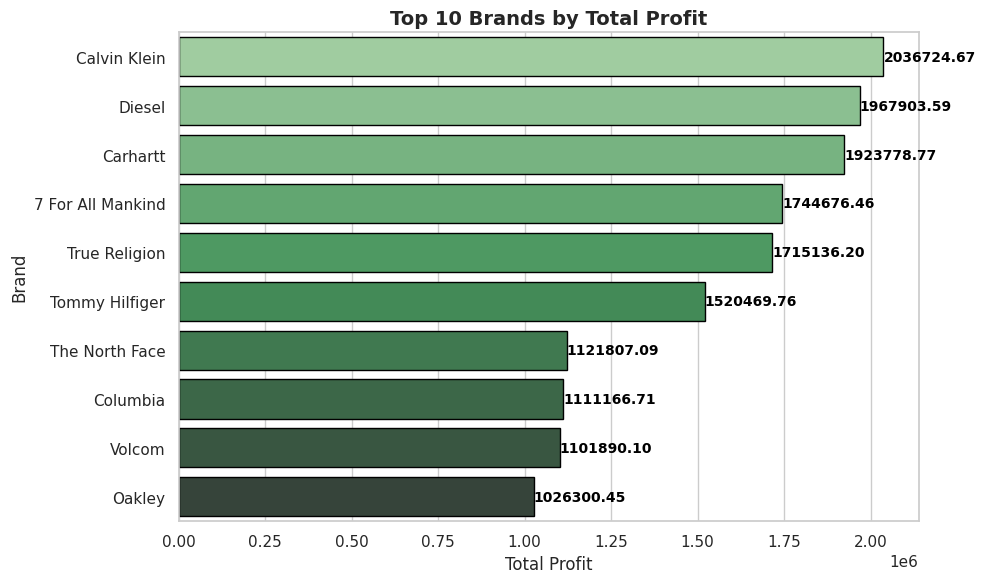

In [ ]:
orders_inv['profit'] = orders_inv['sale_price'] - orders_inv['cost']

top_10_brands_profit = profit_by_brand_sorted.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_10_brands_profit['product_brand'],
            x=top_10_brands_profit['total_profit'],
            hue=top_10_brands_profit['product_brand'],
            dodge=False,
            palette="Greens_d",
            edgecolor='black',
            legend=False)
for i, profit in enumerate(top_10_brands_profit['total_profit']):
    plt.text(profit + 0.5, i, f'{profit:.2f}', va='center', ha='left', fontsize=10, fontweight='bold', color='black')

plt.title('Top 10 Brands by Total Profit', fontsize=14, fontweight='bold')
plt.xlabel('Total Profit', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.tight_layout()
plt.show()



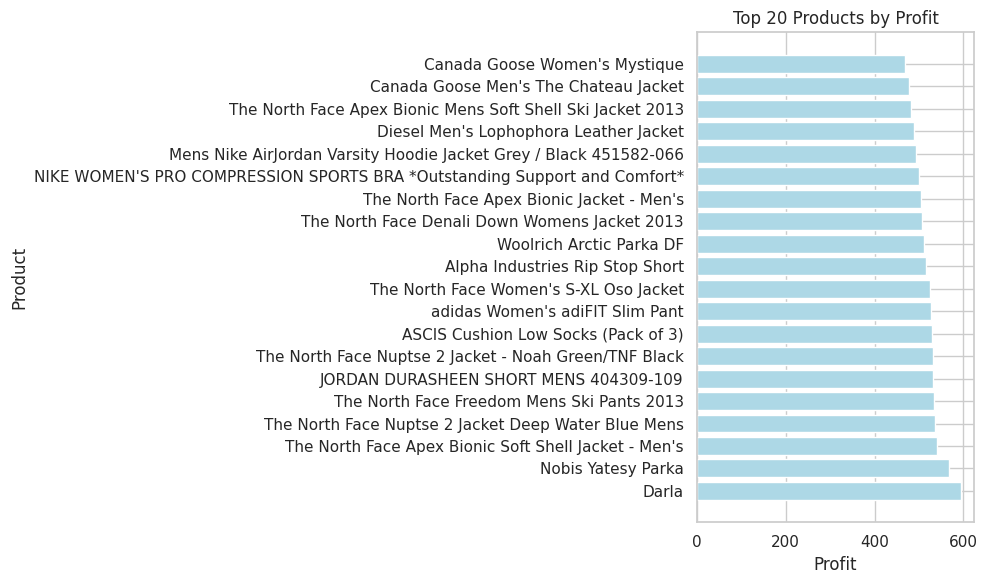

In [ ]:
orders_inv['profit'] = orders_inv['sale_price'] - orders_inv['cost']


top_20_products = product_profit_margins.drop_duplicates(subset='product_name').sort_values(by='profit_margin', ascending=False).head(20)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_20_products['product_name'], top_20_products['profit_margin'], color='lightblue')

plt.xlabel('Profit')
plt.ylabel('Product')
plt.title('Top 20 Products by Profit')

plt.tight_layout()
plt.show()



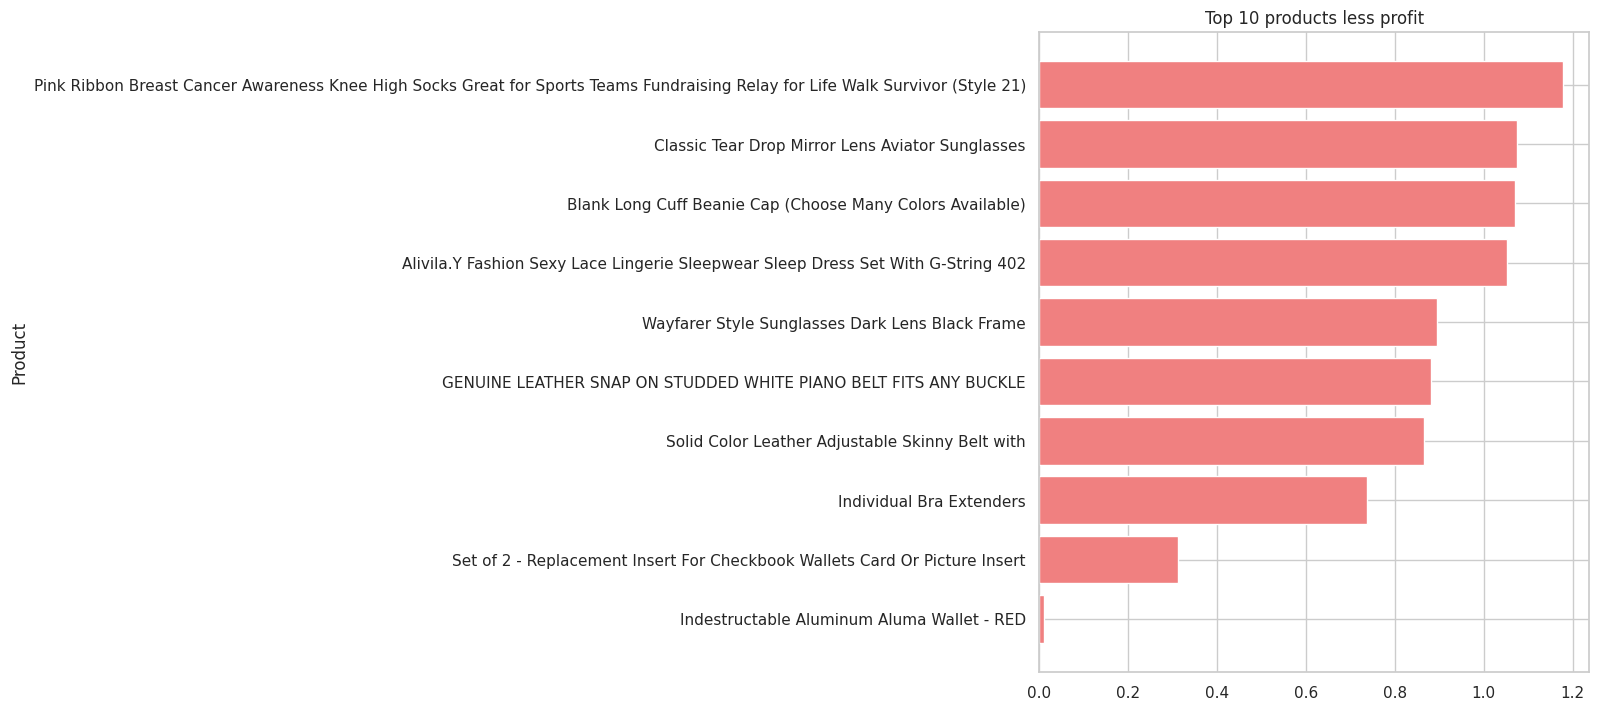

In [ ]:
orders_inv['profit'] = orders_inv['sale_price'] - orders_inv['cost']

plt.figure(figsize=(11, 8))
plt.barh(bottom_20_unique_products['product_name'], bottom_20_unique_products['profit_margin'], color='lightcoral')

plt.ylabel('Product')
plt.title('Top 10 products less profit')

plt.subplots_adjust(left=0.4, right=0.90, top=1, bottom=0.2)
plt.show()


In [ ]:
orders_inv['profit'] = orders_inv['sale_price'] - orders_inv['cost']

sales_by_distribution_center = sold_products.groupby('product_distribution_center_id')['product_id'].count().reset_index()

sales_by_distribution_center.columns = ['Distribution Center ID', 'Products Sold']

sales_by_distribution_center = sales_by_distribution_center.sort_values(by='Products Sold', ascending=False)

print("\nSales by distribution center:")
print(sales_by_distribution_center)



Sales by distribution center:
   Distribution Center ID  Products Sold
1                       2          64871
0                       1          63912
2                       3          61418
7                       8          48892
3                       4          46375
6                       7          45152
8                       9          44442
5                       6          43947
4                       5          34416
9                      10          31890


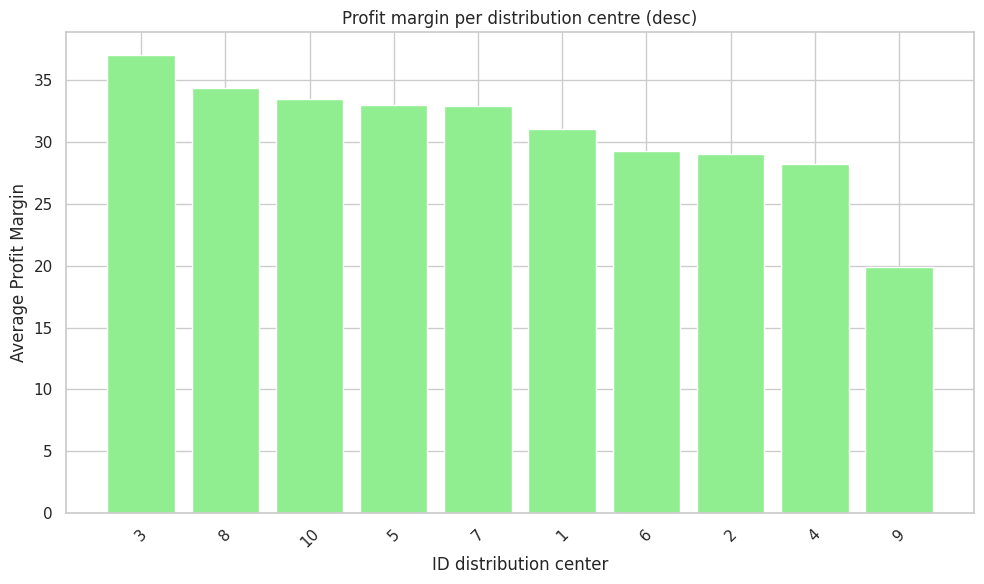

In [ ]:
orders_inv['profit'] = orders_inv['sale_price'] - orders_inv['cost']

plt.figure(figsize=(10, 6))
plt.bar(profit_by_distribution_center_desc['Distribution Center ID'].astype(str),
        profit_by_distribution_center_desc['Average Profit Margin'],
        color='lightgreen')

plt.xlabel('ID distribution center')
plt.ylabel('Average Profit Margin')
plt.title('Profit margin per distribution centre (desc)')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
